In [ ]:
## looking to set data up sequentially to be able to put into a RNN

In [2]:
## starting model refinement and testing in this notebook 

# Import our dependencies
import pandas as pd
from datetime import datetime
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Read in our ramen data
CALI_df= pd.read_csv("../Resources/Predictions_Resources/City_Zhvi_AllHomes.csv",parse_dates=True)
CALI_df

,Unnamed: 0,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1996-01-31,...,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31
0,0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,196258.0,...,659421.0,659007.0,658239.0,656925.0,655613.0,654394.0,653930.0,653901.0,653565.0,652307.0
1,1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,185649.0,...,712660.0,713807.0,715688.0,718245.0,721896.0,725180.0,730358.0,735910.0,744137.0,752508.0
2,2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,93518.0,...,186844.0,187464.0,188070.0,188496.0,189125.0,189612.0,190179.0,190395.0,190938.0,191907.0
3,3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,130920.0,...,248372.0,248646.0,248725.0,248483.0,248278.0,248090.0,248029.0,248220.0,248599.0,249152.0
4,4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,94041.0,...,182732.0,183350.0,183930.0,184846.0,185490.0,186244.0,186420.0,186962.0,187129.0,187718.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27325,27325,48550,29449,Winton,City,MN,MN,Duluth,Saint Louis County,NaN,...,70929.0,70176.0,68979.0,68537.0,68948.0,69481.0,69423.0,69355.0,69654.0,70399.0
27326,27326,51821,29449,Eastabuchie,City,MS,MS,Laurel,Jones County,NaN,...,77737.0,78461.0,79138.0,79930.0,79683.0,79838.0,80272.0,80969.0,81871.0,82284.0
27327,27327,232607,29449,Dean,City,TX,TX,Wichita Falls,Clay County,NaN,...,178872.0,179976.0,180654.0,181188.0,181613.0,182101.0,182424.0,182764.0,182639.0,182361.0
27328,27328,6638,29449,Pulaski,City,GA,GA,NaN,Candler County,NaN,...,97356.0,97757.0,98014.0,98225.0,98303.0,98613.0,98802.0,99227.0,99699.0,100464.0


In [3]:

CALI_df=CALI_df[CALI_df["Metro"]=="San Francisco-Oakland-Hayward"]
CALI_df

,Unnamed: 0,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1996-01-31,...,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31
14,14,20330,14,San Francisco,City,CA,CA,San Francisco-Oakland-Hayward,San Francisco County,297118.0,...,1399537.0,1401434.0,1399378.0,1403962.0,1409597.0,1418410.0,1431606.0,1438161.0,1445113.0,1447191.0
45,45,13072,45,Oakland,City,CA,CA,San Francisco-Oakland-Hayward,Alameda County,156489.0,...,759840.0,762928.0,766401.0,769974.0,772131.0,774320.0,780289.0,788547.0,795321.0,801072.0
114,114,11540,115,Fremont,City,CA,CA,San Francisco-Oakland-Hayward,Alameda County,223212.0,...,1106611.0,1097388.0,1091681.0,1088331.0,1088897.0,1088933.0,1094414.0,1103557.0,1111111.0,1117349.0
153,153,18518,155,Hayward,City,CA,CA,San Francisco-Oakland-Hayward,Alameda County,163176.0,...,666488.0,664936.0,665113.0,665697.0,668112.0,669836.0,675350.0,682249.0,688301.0,693428.0
256,256,51518,261,Concord,City,CA,CA,San Francisco-Oakland-Hayward,Contra Costa County,161569.0,...,565471.0,563462.0,563033.0,560781.0,562229.0,565749.0,569796.0,570141.0,569265.0,571879.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23352,23352,19216,25745,Marshall,City,CA,CA,San Francisco-Oakland-Hayward,Marin County,450689.0,...,1068318.0,1080588.0,1087160.0,1093587.0,1103958.0,1120680.0,1141395.0,1170287.0,1203885.0,1235143.0
23453,23453,49856,25861,Stinson Beach,City,CA,CA,San Francisco-Oakland-Hayward,Marin County,NaN,...,3634878.0,3615747.0,3582735.0,3567322.0,3530804.0,3497428.0,3462493.0,3459531.0,3482606.0,3541200.0
23732,23732,50048,26202,Tomales,City,CA,CA,San Francisco-Oakland-Hayward,Marin County,357380.0,...,817579.0,825220.0,822592.0,821673.0,823316.0,828823.0,829744.0,826672.0,829849.0,833518.0
24071,24071,33838,26617,San Gregorio,City,CA,CA,San Francisco-Oakland-Hayward,San Mateo County,NaN,...,1295771.0,1292245.0,1298169.0,1305344.0,1305761.0,1302290.0,1307477.0,1311276.0,1306738.0,1298783.0


In [4]:
## drop unneeded columns
## dropped RegionID, City, State, Metro, CountyName
CALI_df=CALI_df.drop(["Metro","CountyName","Unnamed: 0", "State", "SizeRank","RegionType","StateName","State"], axis=1)


In [5]:
##Rename RegionID to zipcode
CALI_df.rename(columns={"RegionID": 'Zipcode'}, inplace=True)
CALI_df.head()

,Zipcode,RegionName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,...,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31
14,20330,San Francisco,297118.0,296155.0,295503.0,294359.0,293536.0,293161.0,292873.0,293344.0,...,1399537.0,1401434.0,1399378.0,1403962.0,1409597.0,1418410.0,1431606.0,1438161.0,1445113.0,1447191.0
45,13072,Oakland,156489.0,155806.0,155488.0,154907.0,154761.0,154515.0,154268.0,154174.0,...,759840.0,762928.0,766401.0,769974.0,772131.0,774320.0,780289.0,788547.0,795321.0,801072.0
114,11540,Fremont,223212.0,222702.0,222584.0,222327.0,222526.0,222559.0,222674.0,223002.0,...,1106611.0,1097388.0,1091681.0,1088331.0,1088897.0,1088933.0,1094414.0,1103557.0,1111111.0,1117349.0
153,18518,Hayward,163176.0,162543.0,162383.0,162055.0,162122.0,161927.0,161676.0,161527.0,...,666488.0,664936.0,665113.0,665697.0,668112.0,669836.0,675350.0,682249.0,688301.0,693428.0
256,51518,Concord,161569.0,161011.0,161035.0,160695.0,160370.0,159739.0,159470.0,159800.0,...,565471.0,563462.0,563033.0,560781.0,562229.0,565749.0,569796.0,570141.0,569265.0,571879.0


In [6]:
##cast all zipcodes to string from integer
CALI_df["Zipcode"]=CALI_df["Zipcode"].astype(str)

In [7]:
## transpose dates to rows
CALI_df=CALI_df.transpose()
CALI_df.head()

,14,45,114,153,256,298,306,358,368,379,...,20598,22365,22698,23054,23191,23352,23453,23732,24071,26119
Zipcode,20330,13072,11540,18518,51518,16992,26751,16780,13698,13699,...,15366,8646,56453,15926,42528,19216,49856,50048,33838,22508
RegionName,San Francisco,Oakland,Fremont,Hayward,Concord,Berkeley,Richmond,Antioch,San Leandro,San Mateo,...,Dillon Beach,Inverness,Port Costa,San Geronimo,Montara,Marshall,Stinson Beach,Tomales,San Gregorio,Loma Mar
1996-01-31,297118,156489,223212,163176,161569,236615,194790,135223,171368,310087,...,417552,388698,NaN,392920,338974,450689,NaN,357380,NaN,NaN
1996-02-29,296155,155806,222702,162543,161011,236272,194565,134460,170780,309088,...,415293,384619,NaN,386627,339045,446961,NaN,357031,NaN,NaN
1996-03-31,295503,155488,222584,162383,161035,236100,193775,134109,170453,308646,...,416379,384099,NaN,381710,339798,443290,NaN,357468,NaN,NaN


In [8]:
## dont want to do this add the columns are already correct just need to move the index over 

new_header=CALI_df.iloc[1] ##grab all first row data for the column headers
CALI_df=CALI_df[2:] ## take all rows after first row
CALI_df.columns=new_header ## assign all column headers to be equal to row 0 data
CALI_df.head()

RegionName,San Francisco,Oakland,Fremont,Hayward,Concord,Berkeley,Richmond,Antioch,San Leandro,San Mateo,...,Dillon Beach,Inverness,Port Costa,San Geronimo,Montara,Marshall,Stinson Beach,Tomales,San Gregorio,Loma Mar
1996-01-31,297118,156489,223212,163176,161569,236615,194790,135223,171368,310087,...,417552,388698,NaN,392920,338974,450689,NaN,357380,NaN,NaN
1996-02-29,296155,155806,222702,162543,161011,236272,194565,134460,170780,309088,...,415293,384619,NaN,386627,339045,446961,NaN,357031,NaN,NaN
1996-03-31,295503,155488,222584,162383,161035,236100,193775,134109,170453,308646,...,416379,384099,NaN,381710,339798,443290,NaN,357468,NaN,NaN
1996-04-30,294359,154907,222327,162055,160695,235688,192653,133387,169768,307550,...,415465,380603,NaN,374366,341162,434332,NaN,357985,NaN,NaN
1996-05-31,293536,154761,222526,162122,160370,235451,190735,132776,169371,306920,...,418101,380835,NaN,370725,342560,427407,NaN,359463,NaN,NaN


In [76]:
## check that KNN imputer worked 

    
for column in CALI_df.columns:
    print(f"column {column} has {CALI_df[column].isnull().sum()} null values")


column San Francisco has 0 null values
column Oakland has 0 null values
column Fremont has 0 null values
column Hayward has 0 null values
column Concord has 0 null values
column Berkeley has 0 null values
column Richmond has 0 null values
column Antioch has 0 null values
column San Leandro has 0 null values
column San Mateo has 0 null values
column Daly City has 0 null values
column Livermore has 0 null values
column Redwood City has 0 null values
column Pittsburg has 156 null values
column Walnut Creek has 0 null values
column San Ramon has 0 null values
column Pleasanton has 0 null values
column San Rafael has 0 null values
column Union City has 0 null values
column Brentwood has 0 null values
column Alameda has 0 null values
column South San Francisco has 0 null values
column Novato has 0 null values
column Danville has 0 null values
column Castro Valley has 0 null values
column Martinez has 0 null values
column Dublin has 0 null values
column Newark has 0 null values
column Menlo P

In [9]:
CALI_df.dropna(axis=1)
len(CALI_df)

291

In [25]:
zips= CALI_df.columns.tolist()
len(zips)

924

In [12]:
## dropping cities with nulls 

CALI_df.drop(columns=["Port Costa","Canyon","Crockett","Pittsburg"],inplace=True)

In [14]:
## check that KNN imputer worked 

    
for column in CALI_df.columns:
    print(f"column {column} has {CALI_df[column].isnull().sum()} null values")


column San Francisco has 0 null values
column Oakland has 0 null values
column Fremont has 0 null values
column Hayward has 0 null values
column Concord has 0 null values
column Berkeley has 0 null values
column Richmond has 0 null values
column Antioch has 0 null values
column San Leandro has 0 null values
column San Mateo has 0 null values
column Daly City has 0 null values
column Livermore has 0 null values
column Redwood City has 0 null values
column Walnut Creek has 0 null values
column San Ramon has 0 null values
column Pleasanton has 0 null values
column San Rafael has 0 null values
column Union City has 0 null values
column Brentwood has 0 null values
column Alameda has 0 null values
column South San Francisco has 0 null values
column Novato has 0 null values
column Danville has 0 null values
column Castro Valley has 0 null values
column Martinez has 0 null values
column Dublin has 0 null values
column Newark has 0 null values
column Menlo Park has 0 null values
column San Brun

In [23]:
CALI_df.head()

RegionName,San Francisco,Oakland,Fremont,Hayward,Concord,Berkeley,Richmond,Antioch,San Leandro,San Mateo,...,La Honda,Dillon Beach,Inverness,San Geronimo,Montara,Marshall,Stinson Beach,Tomales,San Gregorio,Loma Mar
1996-01-31,297118,156489,223212,163176,161569,236615,194790,135223,171368,310087,...,496957,417552,388698,392920,338974,450689,NaN,357380,NaN,NaN
1996-02-29,296155,155806,222702,162543,161011,236272,194565,134460,170780,309088,...,496014,415293,384619,386627,339045,446961,NaN,357031,NaN,NaN
1996-03-31,295503,155488,222584,162383,161035,236100,193775,134109,170453,308646,...,497679,416379,384099,381710,339798,443290,NaN,357468,NaN,NaN
1996-04-30,294359,154907,222327,162055,160695,235688,192653,133387,169768,307550,...,499765,415465,380603,374366,341162,434332,NaN,357985,NaN,NaN
1996-05-31,293536,154761,222526,162122,160370,235451,190735,132776,169371,306920,...,501333,418101,380835,370725,342560,427407,NaN,359463,NaN,NaN


In [22]:
CALI_df.to_csv("../Resources/Predictions_Resources/bay_area.csv", encoding='utf-8')

In [76]:
# sf but area code is wrong, IN = 47401

# removing last 20 for testing set 0:271
training_set = CALI_df.iloc[:271, 0:1].values
training_set

array([[297118.0],
       [296155.0],
       [295503.0],
       [294359.0],
       [293536.0],
       [293161.0],
       [292873.0],
       [293344.0],
       [294068.0],
       [295381.0],
       [296744.0],
       [298433.0],
       [300639.0],
       [303292.0],
       [306176.0],
       [308820.0],
       [311827.0],
       [314768.0],
       [318330.0],
       [321488.0],
       [324896.0],
       [327974.0],
       [331664.0],
       [335688.0],
       [339758.0],
       [343928.0],
       [347978.0],
       [352602.0],
       [357142.0],
       [361805.0],
       [366248.0],
       [370465.0],
       [374822.0],
       [379186.0],
       [383202.0],
       [386443.0],
       [389086.0],
       [392224.0],
       [395798.0],
       [399688.0],
       [403467.0],
       [407765.0],
       [412423.0],
       [417729.0],
       [422910.0],
       [428667.0],
       [435166.0],
       [442790.0],
       [451273.0],
       [459100.0],
       [467482.0],
       [475803.0],
       [4851

In [80]:
len(training_set)

271

In [81]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)


In [82]:
# Creating a data structure with 60 timesteps and 1 output
import numpy as np
X_train = []
y_train = []
for i in range(60, 271):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [83]:
len(X_train)

211

In [84]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [85]:


# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [86]:

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
7/7 [==============================] - 1s 77ms/step - loss: 0.1343
Epoch 2/100
7/7 [==============================] - 1s 79ms/step - loss: 0.0302
Epoch 3/100
7/7 [==============================] - 1s 77ms/step - loss: 0.0217
Epoch 4/100
7/7 [==============================] - 1s 78ms/step - loss: 0.0180
Epoch 5/100
7/7 [==============================] - 1s 78ms/step - loss: 0.0157
Epoch 6/100
7/7 [==============================] - 1s 79ms/step - loss: 0.0114
Epoch 7/100
7/7 [==============================] - 1s 78ms/step - loss: 0.0128
Epoch 8/100
7/7 [==============================] - 1s 113ms/step - loss: 0.0098
Epoch 9/100
7/7 [==============================] - 1s 139ms/step - loss: 0.0081
Epoch 10/100
7/7 [==============================] - 1s 100ms/step - loss: 0.0088
Epoch 11/100
7/7 [==============================] - 1s 86ms/step - loss: 0.0087
Epoch 12/100
7/7 [==============================] - 1s 109ms/step - loss: 0.0076
Epoch 13/100
7/7 [===========================

In [24]:

# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv("../Resources/Predictions_Resources/bay_area.csv")
dataset_test.head()


,Unnamed: 0,San Francisco,Oakland,Fremont,Hayward,Concord,Berkeley,Richmond,Antioch,San Leandro,...,La Honda,Dillon Beach,Inverness,San Geronimo,Montara,Marshall,Stinson Beach,Tomales,San Gregorio,Loma Mar
0,1996-01-31,297118.0,156489.0,223212.0,163176.0,161569.0,236615.0,194790.0,135223.0,171368.0,...,496957.0,417552.0,388698.0,392920.0,338974.0,450689.0,NaN,357380.0,NaN,NaN
1,1996-02-29,296155.0,155806.0,222702.0,162543.0,161011.0,236272.0,194565.0,134460.0,170780.0,...,496014.0,415293.0,384619.0,386627.0,339045.0,446961.0,NaN,357031.0,NaN,NaN
2,1996-03-31,295503.0,155488.0,222584.0,162383.0,161035.0,236100.0,193775.0,134109.0,170453.0,...,497679.0,416379.0,384099.0,381710.0,339798.0,443290.0,NaN,357468.0,NaN,NaN
3,1996-04-30,294359.0,154907.0,222327.0,162055.0,160695.0,235688.0,192653.0,133387.0,169768.0,...,499765.0,415465.0,380603.0,374366.0,341162.0,434332.0,NaN,357985.0,NaN,NaN
4,1996-05-31,293536.0,154761.0,222526.0,162122.0,160370.0,235451.0,190735.0,132776.0,169371.0,...,501333.0,418101.0,380835.0,370725.0,342560.0,427407.0,NaN,359463.0,NaN,NaN


In [27]:
real_housing_price = dataset_test.iloc[:, 1:2].values
real_housing_price

array([[ 297118.],
       [ 296155.],
       [ 295503.],
       [ 294359.],
       [ 293536.],
       [ 293161.],
       [ 292873.],
       [ 293344.],
       [ 294068.],
       [ 295381.],
       [ 296744.],
       [ 298433.],
       [ 300639.],
       [ 303292.],
       [ 306176.],
       [ 308820.],
       [ 311827.],
       [ 314768.],
       [ 318330.],
       [ 321488.],
       [ 324896.],
       [ 327974.],
       [ 331664.],
       [ 335688.],
       [ 339758.],
       [ 343928.],
       [ 347978.],
       [ 352602.],
       [ 357142.],
       [ 361805.],
       [ 366248.],
       [ 370465.],
       [ 374822.],
       [ 379186.],
       [ 383202.],
       [ 386443.],
       [ 389086.],
       [ 392224.],
       [ 395798.],
       [ 399688.],
       [ 403467.],
       [ 407765.],
       [ 412423.],
       [ 417729.],
       [ 422910.],
       [ 428667.],
       [ 435166.],
       [ 442790.],
       [ 451273.],
       [ 459100.],
       [ 467482.],
       [ 475803.],
       [ 485

In [60]:
training= dataset_test.iloc[0:271, 1:2]
print(len(training))
training

271


,San Francisco
0,297118.0
1,296155.0
2,295503.0
3,294359.0
4,293536.0
...,...
266,1355929.0
267,1377735.0
268,1387011.0
269,1399056.0


In [47]:
# make DF to set up input for testing 

training = CALI_df.iloc[:, 0:1]
training.reset_index(drop=True, inplace=True)
training

RegionName,San Francisco
0,297118
1,296155
2,295503
3,294359
4,293536
...,...
286,1.41841e+06
287,1.43161e+06
288,1.43816e+06
289,1.44511e+06


In [68]:
test = CALI_df.iloc[271:, 0:1]
test.reset_index(drop=True, inplace=True)
print(len(test))
test

20


RegionName,San Francisco
0,1.4166e+06
1,1.41707e+06
2,1.4181e+06
3,1.4133e+06
4,1.40471e+06
5,1.40537e+06
6,1.40542e+06
7,1.40548e+06
8,1.40077e+06
9,1.40244e+06


In [69]:
# test

In [63]:
type(test)

pandas.core.frame.DataFrame

In [64]:
type(training)

pandas.core.frame.DataFrame

In [65]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((training, test), axis = 0)
dataset_total

RegionName,San Francisco
0,297118
1,296155
2,295503
3,294359
4,293536
...,...
15,1.41841e+06
16,1.43161e+06
17,1.43816e+06
18,1.44511e+06


In [70]:
inputs = dataset_total[len(dataset_total) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [87]:
len(inputs)

80

In [93]:
X_test = []

for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_housing_price = regressor.predict(X_test)
predicted_housing_price = sc.inverse_transform(predicted_housing_price)

In [94]:
predicted_housing_price

array([[1335275.2],
       [1353132.5],
       [1370723.2],
       [1387575.1],
       [1403155.1],
       [1416895.6],
       [1428393.9],
       [1437439.5],
       [1444009.1],
       [1448173.4],
       [1450150.9],
       [1450211.8],
       [1448708. ],
       [1445986.2],
       [1442449.9],
       [1438539.2],
       [1434734.5],
       [1431566.8],
       [1429473.6],
       [1428771.6]], dtype=float32)

In [90]:
forgraph=real_housing_price[271:]
forgraph

array([[1416603.],
       [1417071.],
       [1418097.],
       [1413299.],
       [1404710.],
       [1405370.],
       [1405419.],
       [1405480.],
       [1400771.],
       [1402436.],
       [1399537.],
       [1401434.],
       [1399378.],
       [1403962.],
       [1409597.],
       [1418410.],
       [1431606.],
       [1438161.],
       [1445113.],
       [1447191.]])

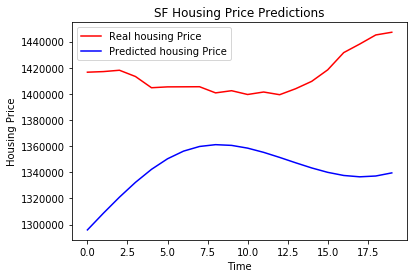

In [95]:
import matplotlib.pyplot as plt
# Visualising the results
plt.plot(forgraph, color = 'red', label = 'Real housing Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted housing Price')
plt.title('SF Housing Price Predictions')
plt.xlabel('Time')
plt.ylabel('Housing Price')
plt.legend()
plt.show()

In [97]:
from sklearn.metrics import mean_squared_error
RNN_mse = mean_squared_error(forgraph,predicted_housing_price)
RNN_rmse=np.sqrt(RNN_mse)
print("mse :",RNN_mse)
print("rmse :",RNN_rmse)

from sklearn.metrics import mean_absolute_error
RNN_MAE = mean_absolute_error(forgraph,predicted_housing_price)
print("MAE :",RNN_MAE)

mse : 1525821632.4640625
rmse : 39061.76688866061
MAE : 33143.1875


 # analysis of RNN 
the RNN is off by an average of 39 K over the 20 months of predictions, more tuning of hyper parameters 
such as amount of epochs ,the number of values in the training set, maybe adding more cities could allow for a better 
prediction instead of having it just do one. there is not much more historical data so cant go much farther back 
also adding multiple players to get the loss down could help. 